# Exploratory analysis of a Dataset

References:
- "Natural Language Processing with Transformers" by Lewis Tunstall, Leandro von Werra and Thomas Wolf.

## Dependencies

In [6]:
from datasets import load_dataset
import matplotlib.pyplot as plt

## Loading dataset

This is reviewed more in deep here:
`./2_datasets.ipynb`

In [3]:
emotions = load_dataset("emotion", trust_remote_code=True)

Format & convert label integer into string

In [4]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

emotions.set_format(type="pandas")
df = emotions["train"][:]
df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


## Look at the Class Distribution

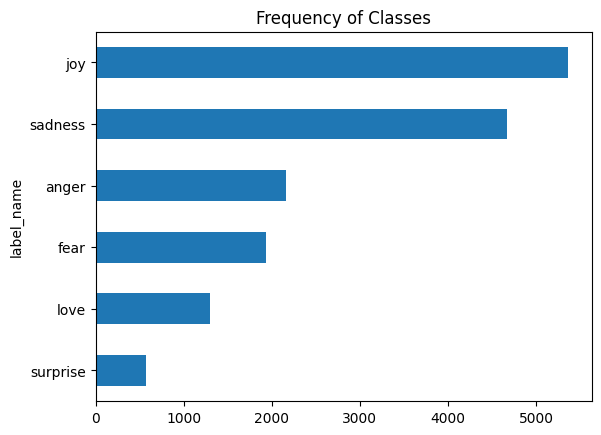

In [7]:
df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

## How Long Are Our Tweets?

Transformers models have a maximum context size

<Axes: title={'center': 'Words Per Tweet'}, xlabel='label_name'>

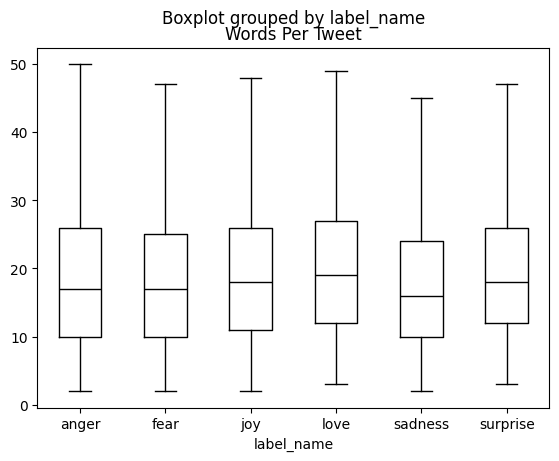

In [9]:
df["Words Per Tweet"] = df['text'].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False, showfliers=False, color="black")